In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

/home/kiwoong/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
import colorsys
import random
import platform

In [3]:
df = pd.read_csv("../petition_data_all.csv")

In [4]:
df

num     category  start-days    end-days          person progress  \
0           21        안전/환경  2017-08-19  2017-11-17     kakao - ***    청원종료    
1           22           기타  2017-08-19  2017-11-17     kakao - ***    청원종료    
2           23           미래  2017-08-19  2017-09-03     kakao - ***    청원종료    
3           24          일자리  2017-08-19  2017-08-26     kakao - ***    청원종료    
4           25           미래  2017-08-19  2017-09-03     kakao - ***    청원종료    
5           26         보건복지  2017-08-19  2017-08-26     naver - ***    청원종료    
6           27         정치개혁  2017-08-19  2017-09-18     naver - ***    청원종료    
7           28        경제민주화  2017-08-19  2017-08-26     naver - ***    청원종료    
8           29           미래  2017-08-19  2017-09-18     naver - ***    청원종료    
9           30          일자리  2017-08-19  2017-11-17     kakao - ***    청원종료    
10          31         보건복지  2017-08-19  2017-11-17   twitter - ***    청원종료    
11          32        경제민주화  2017-08-19  2017-09-03     naver - ***    청원종료    
12          33       인권/성평등  2017-08-19  2017-11-17     naver - ***    청원종료    
13          34           기타  2017-08-19  2017-09-18     naver - ***    청원종료    
14          35     외교/통일/국방  2017-08-19  2017-08-26     kakao - ***    청원종료    
15          36       인권/성평등  2017-08-19  2017-08-26     naver - ***    청원종료    
16          37           기타  2017-08-19  2017-09-18  facebook - ***    청원종료    
17          38     외교/통일/국방  2017-08-19  2017-08-26     kakao - ***    청원종료    
18          40     외교/통일/국방  2017-08-19  2017-09-18     naver - ***    청원종료    
19          41     외교/통일/국방  2017-08-19  2017-09-18     naver - ***    청원종료    
20          42        육아/교육  2017-08-19  2017-09-18     naver - ***    청원종료    
21          43        육아/교육  2017-08-19  2017-09-18     naver - ***    청원종료    
22          44        육아/교육  2017-08-19  2017-09-18  facebook - ***    청원종료    
23          45        육아/교육  2017-08-19  2017-11-17  facebook - ***    청원종료    
24          46        육아/교육  2017-08-19  2017-09-18     naver - ***    청원종료    
25          47     외교/통일/국방  2017-08-19  2017-09-18  facebook - ***    청원종료    
26          48  문화/예술/체육/언론  2017-08-19  2017-09-18  facebook - ***    청원종료    
27          49          일자리  2017-08-19  2017-11-17     naver - ***    청원종료    
28          50          일자리  2017-08-19  2017-10-18     naver - ***    청원종료    
29          51        경제민주화  2017-08-19  2017-11-17     naver - ***    청원종료    
...        ...          ...         ...         ...             ...      ...   
371200  484310       인권/성평등  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371201  484311     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371202  484312           미래  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371203  484313        안전/환경  2019-01-01  2019-01-31     naver - ***   청원진행중    
371204  484314        안전/환경  2019-01-01  2019-01-31     naver - ***   청원진행중    
371205  484315         정치개혁  2019-01-01  2019-01-31     naver - ***   청원진행중    
371206  484316       인권/성평등  2019-01-01  2019-01-31     naver - ***   청원진행중    
371207  484317     외교/통일/국방  2019-01-01  2019-01-31     naver - ***   청원진행중    
371208  484318           기타  2019-01-01  2019-01-31     naver - ***   청원진행중    
371209  484319     외교/통일/국방  2019-01-01  2019-01-31     naver - ***   청원진행중    
371210  484320         정치개혁  2019-01-01  2019-01-31     naver - ***   청원진행중    
371211  484321          일자리  2019-01-01  2019-01-31     naver - ***   청원진행중    
371212  484322    저출산/고령화대책  2019-01-01  2019-01-31     naver - ***   청원진행중    
371213  484323       인권/성평등  2019-01-01  2019-01-31  facebook - ***   청원진행중    
371214  484324     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371215  484325         정치개혁  2019-01-01  2019-01-31     naver - ***   청원진행중    
371216  484326         정치개혁  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371217  484327           미래  2019-01-01  2019-01-31     naver - ***   청원진행중    
371218  484

In [5]:
df[(df["count"]>=1) & (df["count"]<=5)]

num     category  start-days    end-days          person progress  \
5           26         보건복지  2017-08-19  2017-08-26     naver - ***    청원종료    
6           27         정치개혁  2017-08-19  2017-09-18     naver - ***    청원종료    
8           29           미래  2017-08-19  2017-09-18     naver - ***    청원종료    
9           30          일자리  2017-08-19  2017-11-17     kakao - ***    청원종료    
15          36       인권/성평등  2017-08-19  2017-08-26     naver - ***    청원종료    
33          56         보건복지  2017-08-19  2017-11-17     naver - ***    청원종료    
34          57          일자리  2017-08-19  2017-09-03     naver - ***    청원종료    
36          59         반려동물  2017-08-19  2017-10-18     naver - ***    청원종료    
40          63         보건복지  2017-08-20  2017-09-04  facebook - ***    청원종료    
41          64        육아/교육  2017-08-20  2017-09-04     naver - ***    청원종료    
45          68           미래  2017-08-20  2017-09-19     kakao - ***    청원종료    
59          82         보건복지  2017-08-20  2017-09-19     naver - ***    청원종료    
62          85         보건복지  2017-08-20  2017-09-04     naver - ***    청원종료    
65          88           기타  2017-08-20  2017-11-18   twitter - ***    청원종료    
69          92          일자리  2017-08-20  2017-11-18  facebook - ***    청원종료    
70          93     외교/통일/국방  2017-08-20  2017-10-19  facebook - ***    청원종료    
73          97           기타  2017-08-20  2017-08-27  facebook - ***    청원종료    
75          99     교통/건축/국토  2017-08-20  2017-09-19  facebook - ***    청원종료    
80         104        육아/교육  2017-08-20  2017-11-18     kakao - ***    청원종료    
87         111          일자리  2017-08-20  2017-11-18     naver - ***    청원종료    
89         113     교통/건축/국토  2017-08-20  2017-09-04     naver - ***    청원종료    
92         116           기타  2017-08-20  2017-08-27     naver - ***    청원종료    
93         117          일자리  2017-08-20  2017-08-27     naver - ***    청원종료    
94         118           기타  2017-08-20  2017-09-04     kakao - ***    청원종료    
97         121           기타  2017-08-20  2017-08-27     naver - ***    청원종료    
99         123     교통/건축/국토  2017-08-20  2017-08-27     naver - ***    청원종료    
100        124           기타  2017-08-20  2017-08-27   twitter - ***    청원종료    
104        128     교통/건축/국토  2017-08-20  2017-11-18     naver - ***    청원종료    
107        131     교통/건축/국토  2017-08-20  2017-08-27  facebook - ***    청원종료    
108        132        경제민주화  2017-08-20  2017-09-19     naver - ***    청원종료    
...        ...          ...         ...         ...             ...      ...   
371182  484292           행정  2019-01-01  2019-01-31     naver - ***   청원진행중    
371184  484294         정치개혁  2019-01-01  2019-01-31     naver - ***   청원진행중    
371185  484295        경제민주화  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371186  484296     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371188  484298           기타  2019-01-01  2019-01-31     naver - ***   청원진행중    
371189  484299        경제민주화  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371190  484300     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371194  484304           기타  2019-01-01  2019-01-31     naver - ***   청원진행중    
371195  484305  문화/예술/체육/언론  2019-01-01  2019-01-31     naver - ***   청원진행중    
371197  484307           미래  2019-01-01  2019-01-31     naver - ***   청원진행중    
371198  484308  문화/예술/체육/언론  2019-01-01  2019-01-31     naver - ***   청원진행중    
371199  484309     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371200  484310       인권/성평등  2019-01-01  2019-01-31   twitter - ***   청원진행중    
371201  484311     교통/건축/국토  2019-01-01  2019-01-31     naver - ***   청원진행중    
371203  484313        안전/환경  2019-01-01  2019-01-31     naver - ***   청원진행중    
371205  484315         정치개혁  2019-01-01  2019-01-31     naver - ***   청원진행중    
371206  484316       인권/성평등  2019-01-01  2019-01-31     naver - ***   청원진행중    
371207  484317     외교/통일/국방  2019-01-01  2019-01-31     naver - ***   청원진행중    
371208  484

## 추천수 별로 청원이 얼마나 있는지 확인

In [6]:
len(df[df["count"]==0]["num"])

53410

In [15]:
len(df[(df["count"]>=1) & (df["count"]<=2)]["num"])

74522

In [16]:
len(df[(df["count"]>=3) & (df["count"]<=5)]["num"])

66493

In [13]:
len(df[(df["count"]>=6) & (df["count"]<=10)]["num"])

55902

In [17]:
len(df[(df["count"]>=11) & (df["count"]<=20)]["num"])

47826

In [20]:
len(df[(df["count"]>=21) & (df["count"]<=40)]["num"])

33249

In [24]:
len(df[(df["count"]>=41) & (df["count"]<=100)]["num"])

22522

In [6]:
len(df[df["count"]>100]["num"])

17306

## 워드클라우드를 만드는 코드

In [7]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [1]:
def make_cloud(dfs, category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
    text = list(dfs["title"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')

    if platform.system() == 'Darwin': 
        font_url = "/Library/Fonts/AppleGothic.ttf"
        rc('font', family='AppleGothic')
        #Mac pc의 경우
    elif platform.system() == 'Windows': 
        font_url = 'C:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Linux': 
        font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)

    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
        
    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path=font_url,
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

    return tmp_data

In [2]:
## 추천수가 i개인 청원에 대한 워드클라우드

1063086
ok


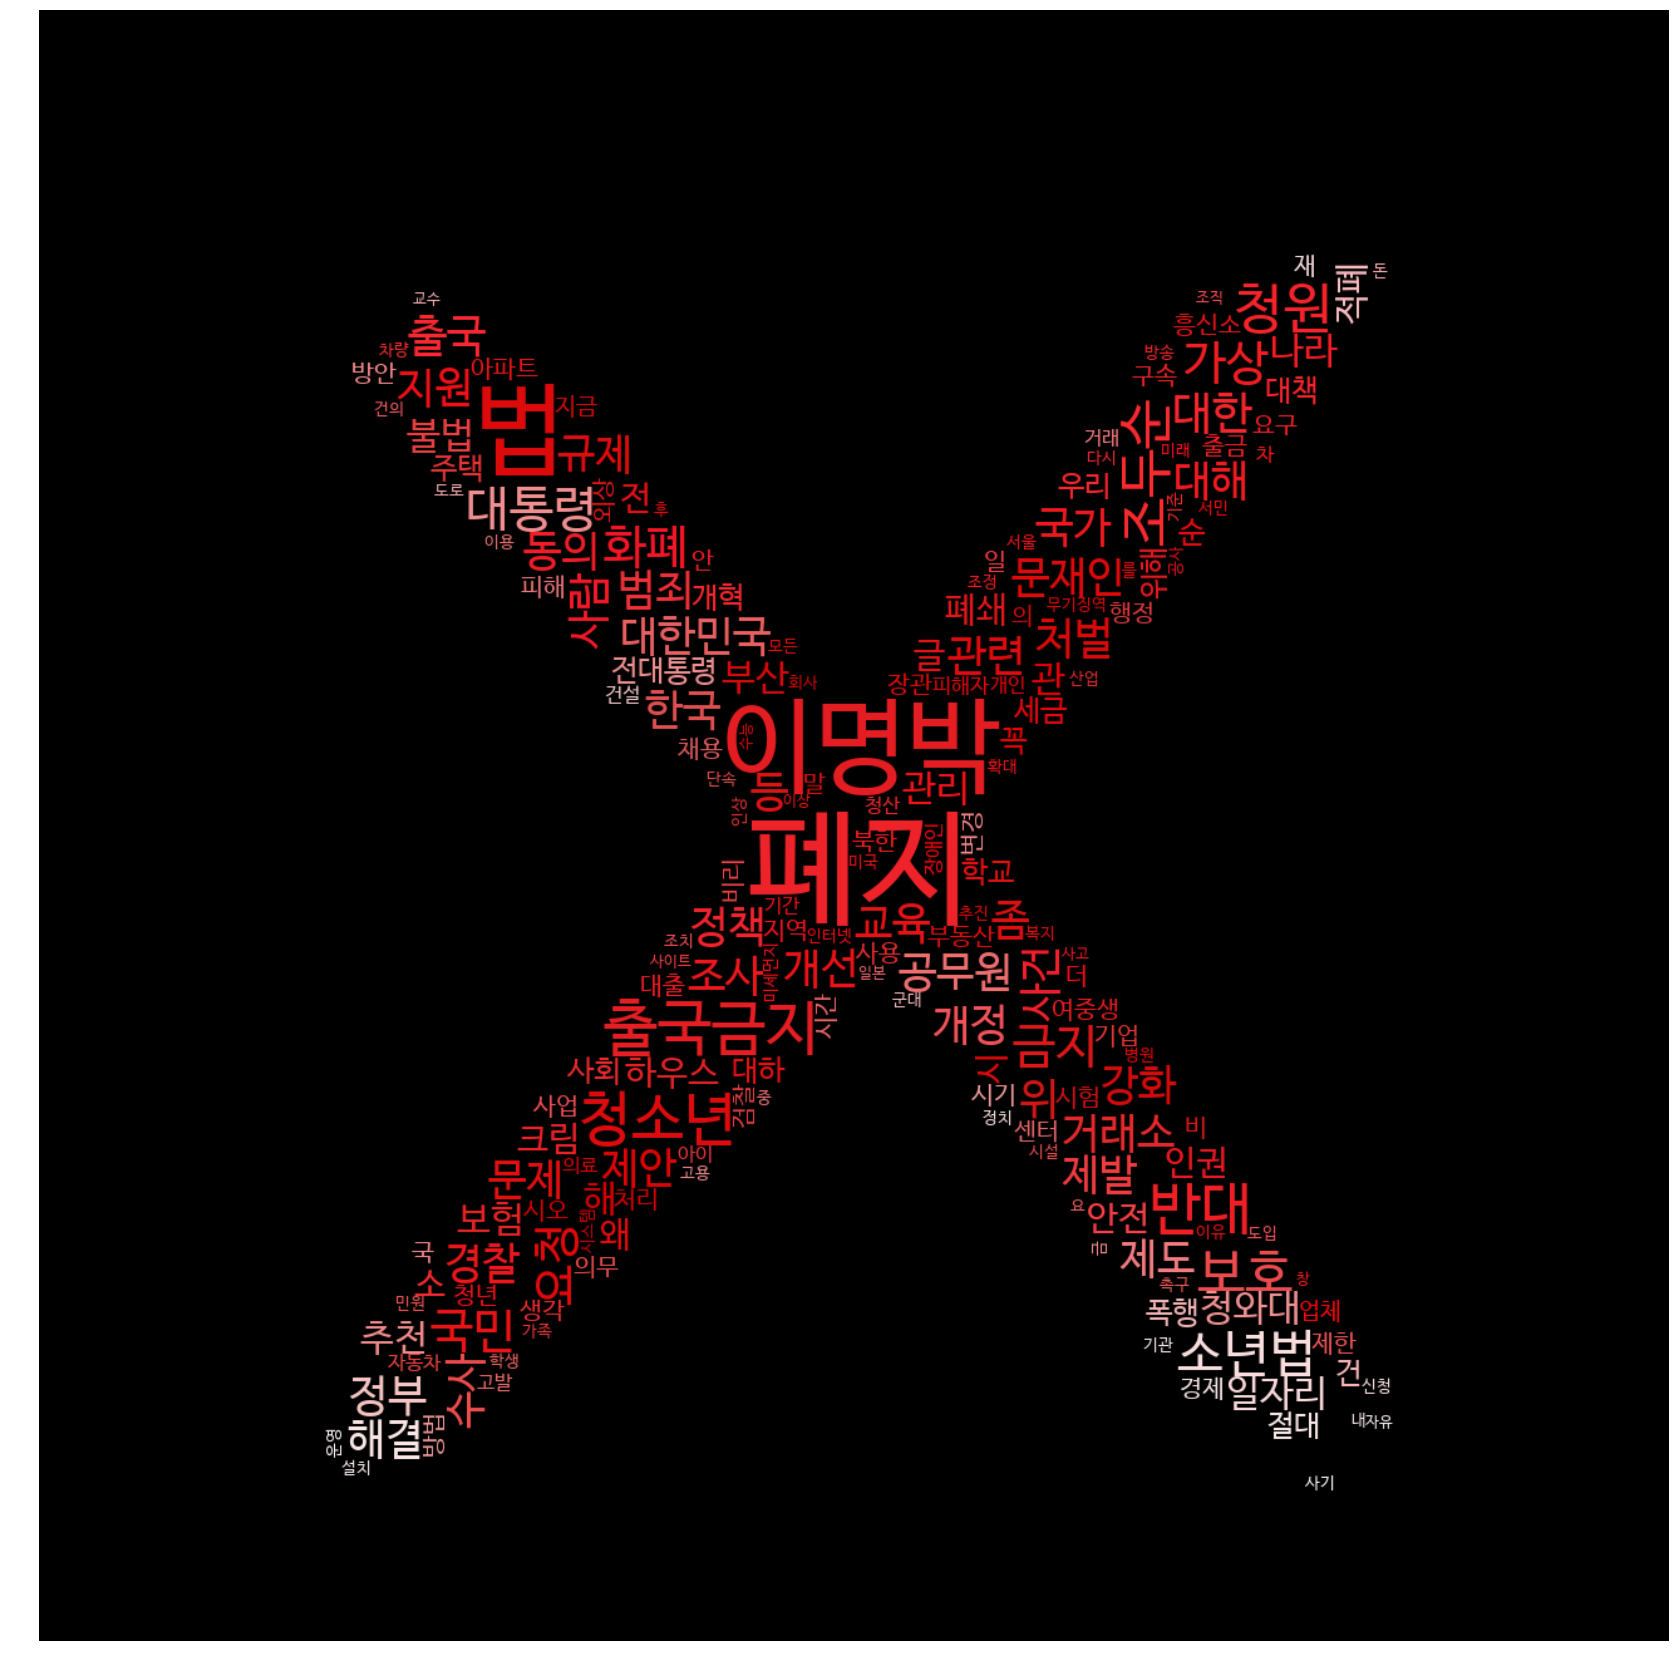

In [33]:
keyword0 = make_cloud(df[df["count"]==0],"기타", png_name="1.jpg",state="img",max_font_size_n = 100,background_color_n='black')

1724884
ok


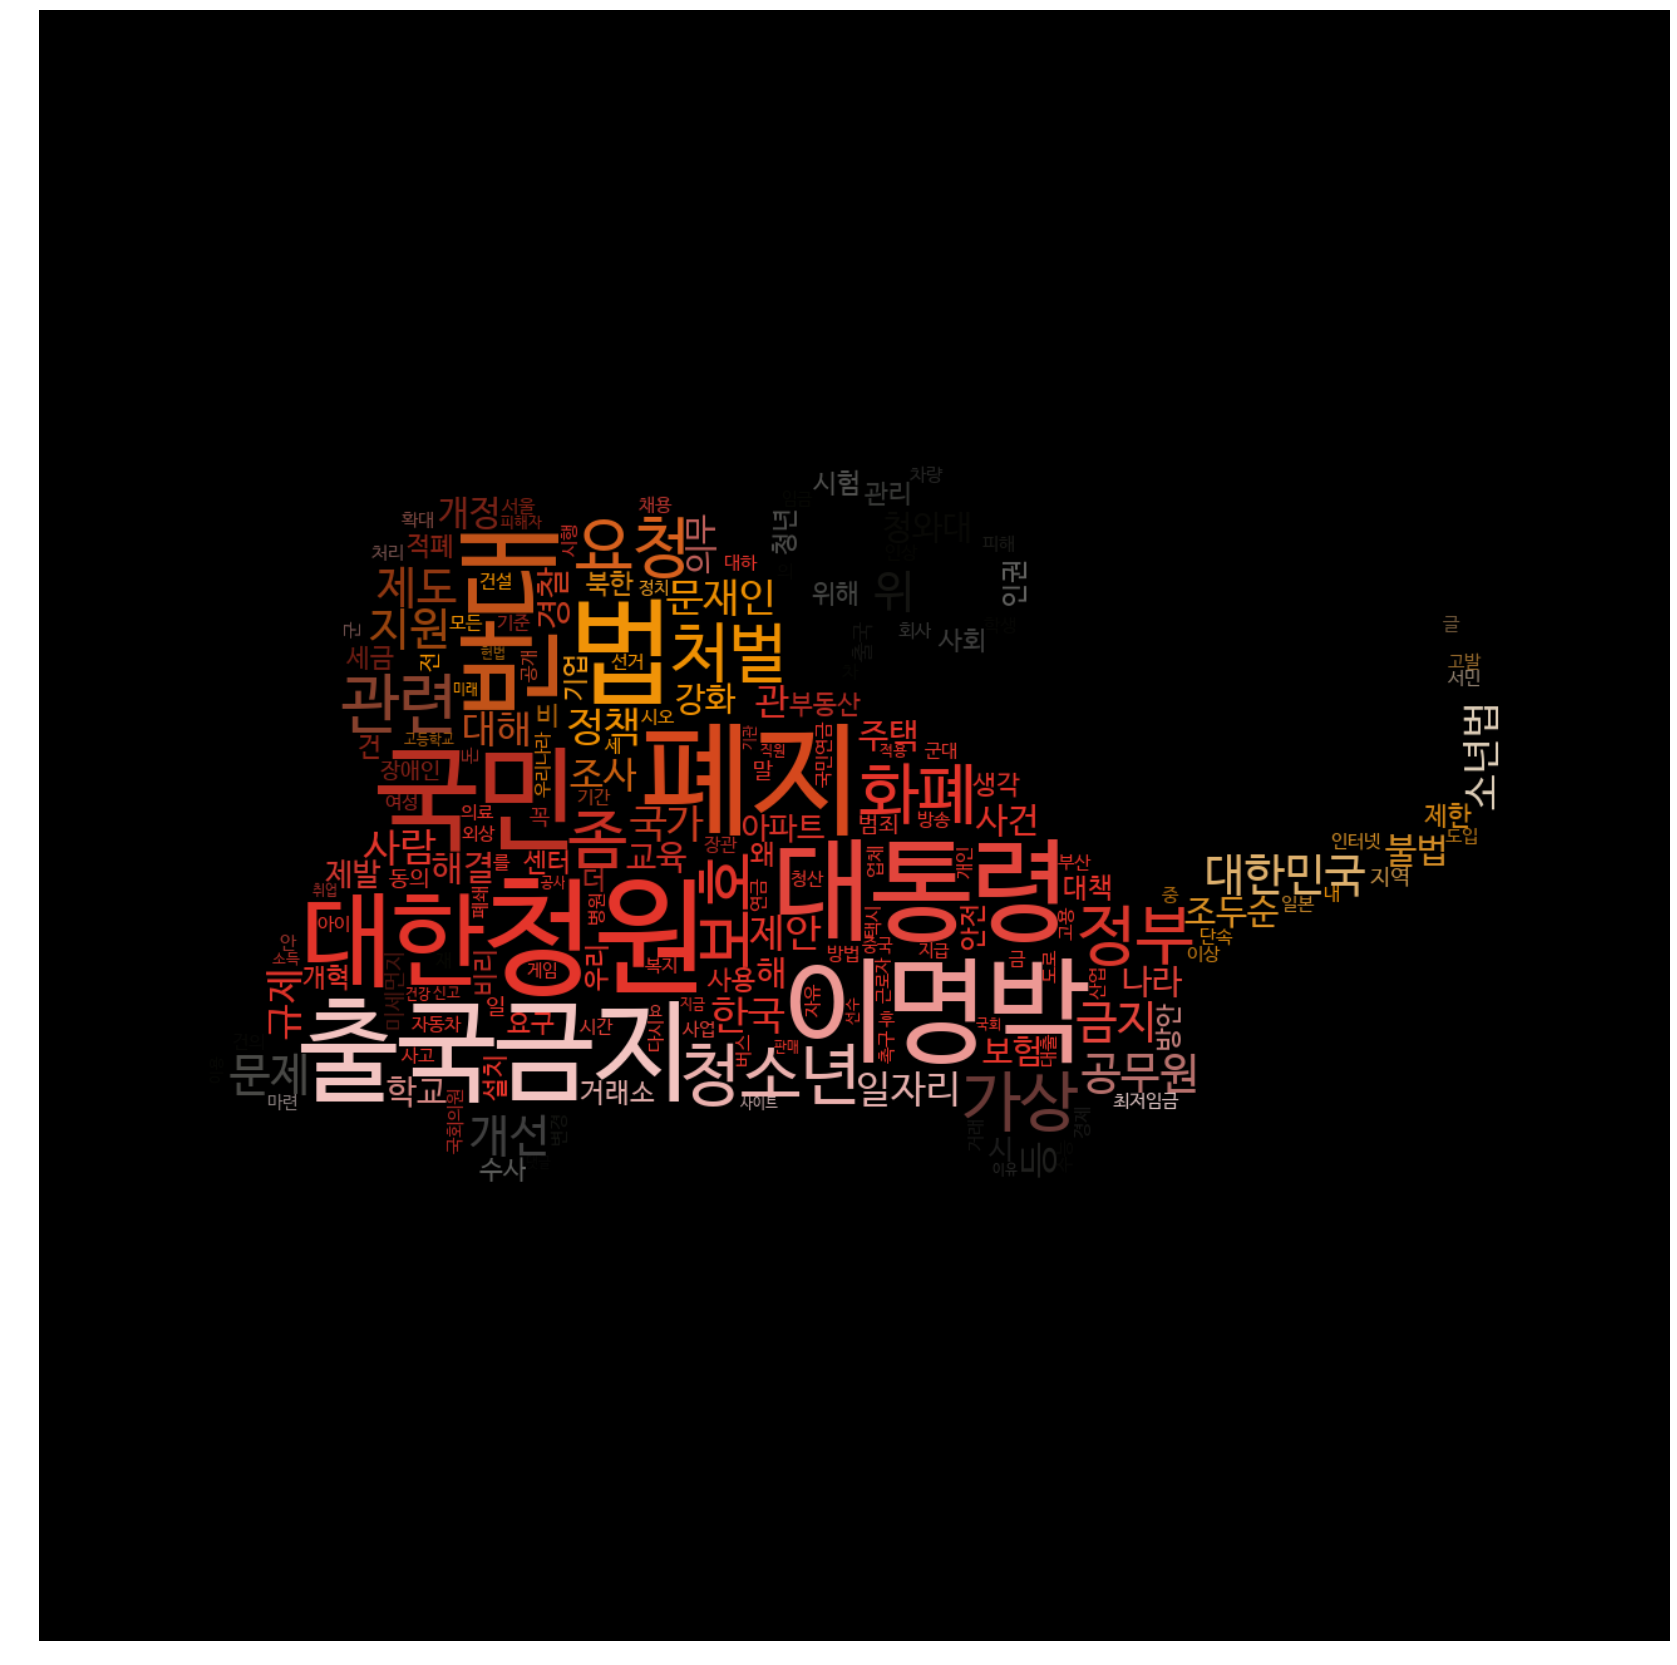

In [11]:
keyword1 = make_cloud(df[(df["count"]>=1) & (df["count"]<=2)],"기타", png_name="3.jpg",state="img",max_font_size_n = 100,background_color_n='black')

1625478
ok


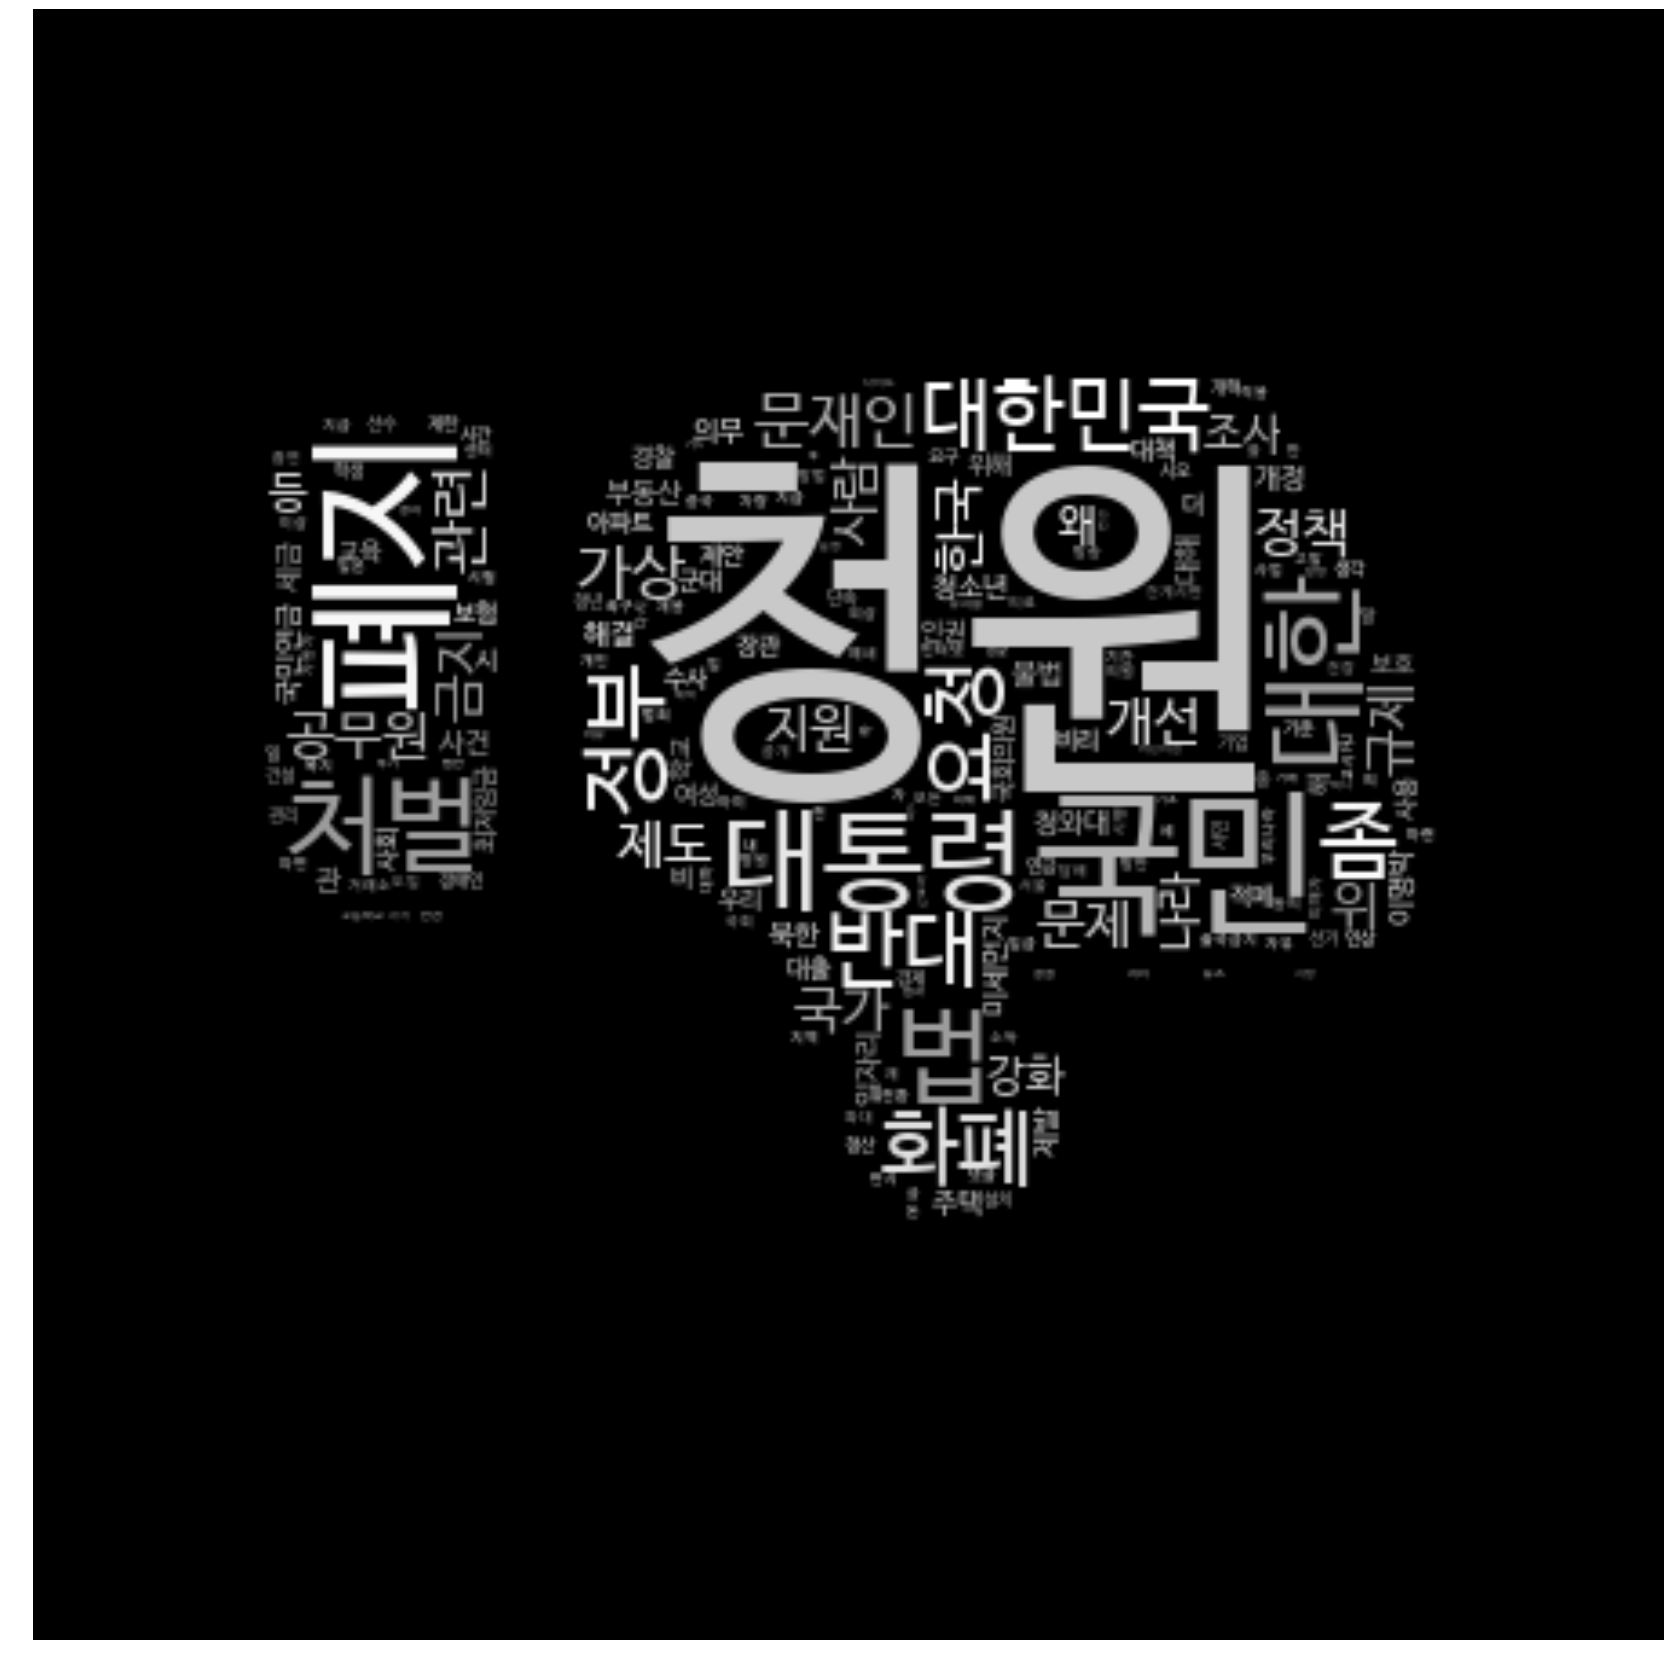

In [12]:
keyword2 = make_cloud(df[(df["count"]>=3) & (df["count"]<=5)],"기타", png_name="2.jpg",state="grey",max_font_size_n = 100,background_color_n='black')

1405923
ok


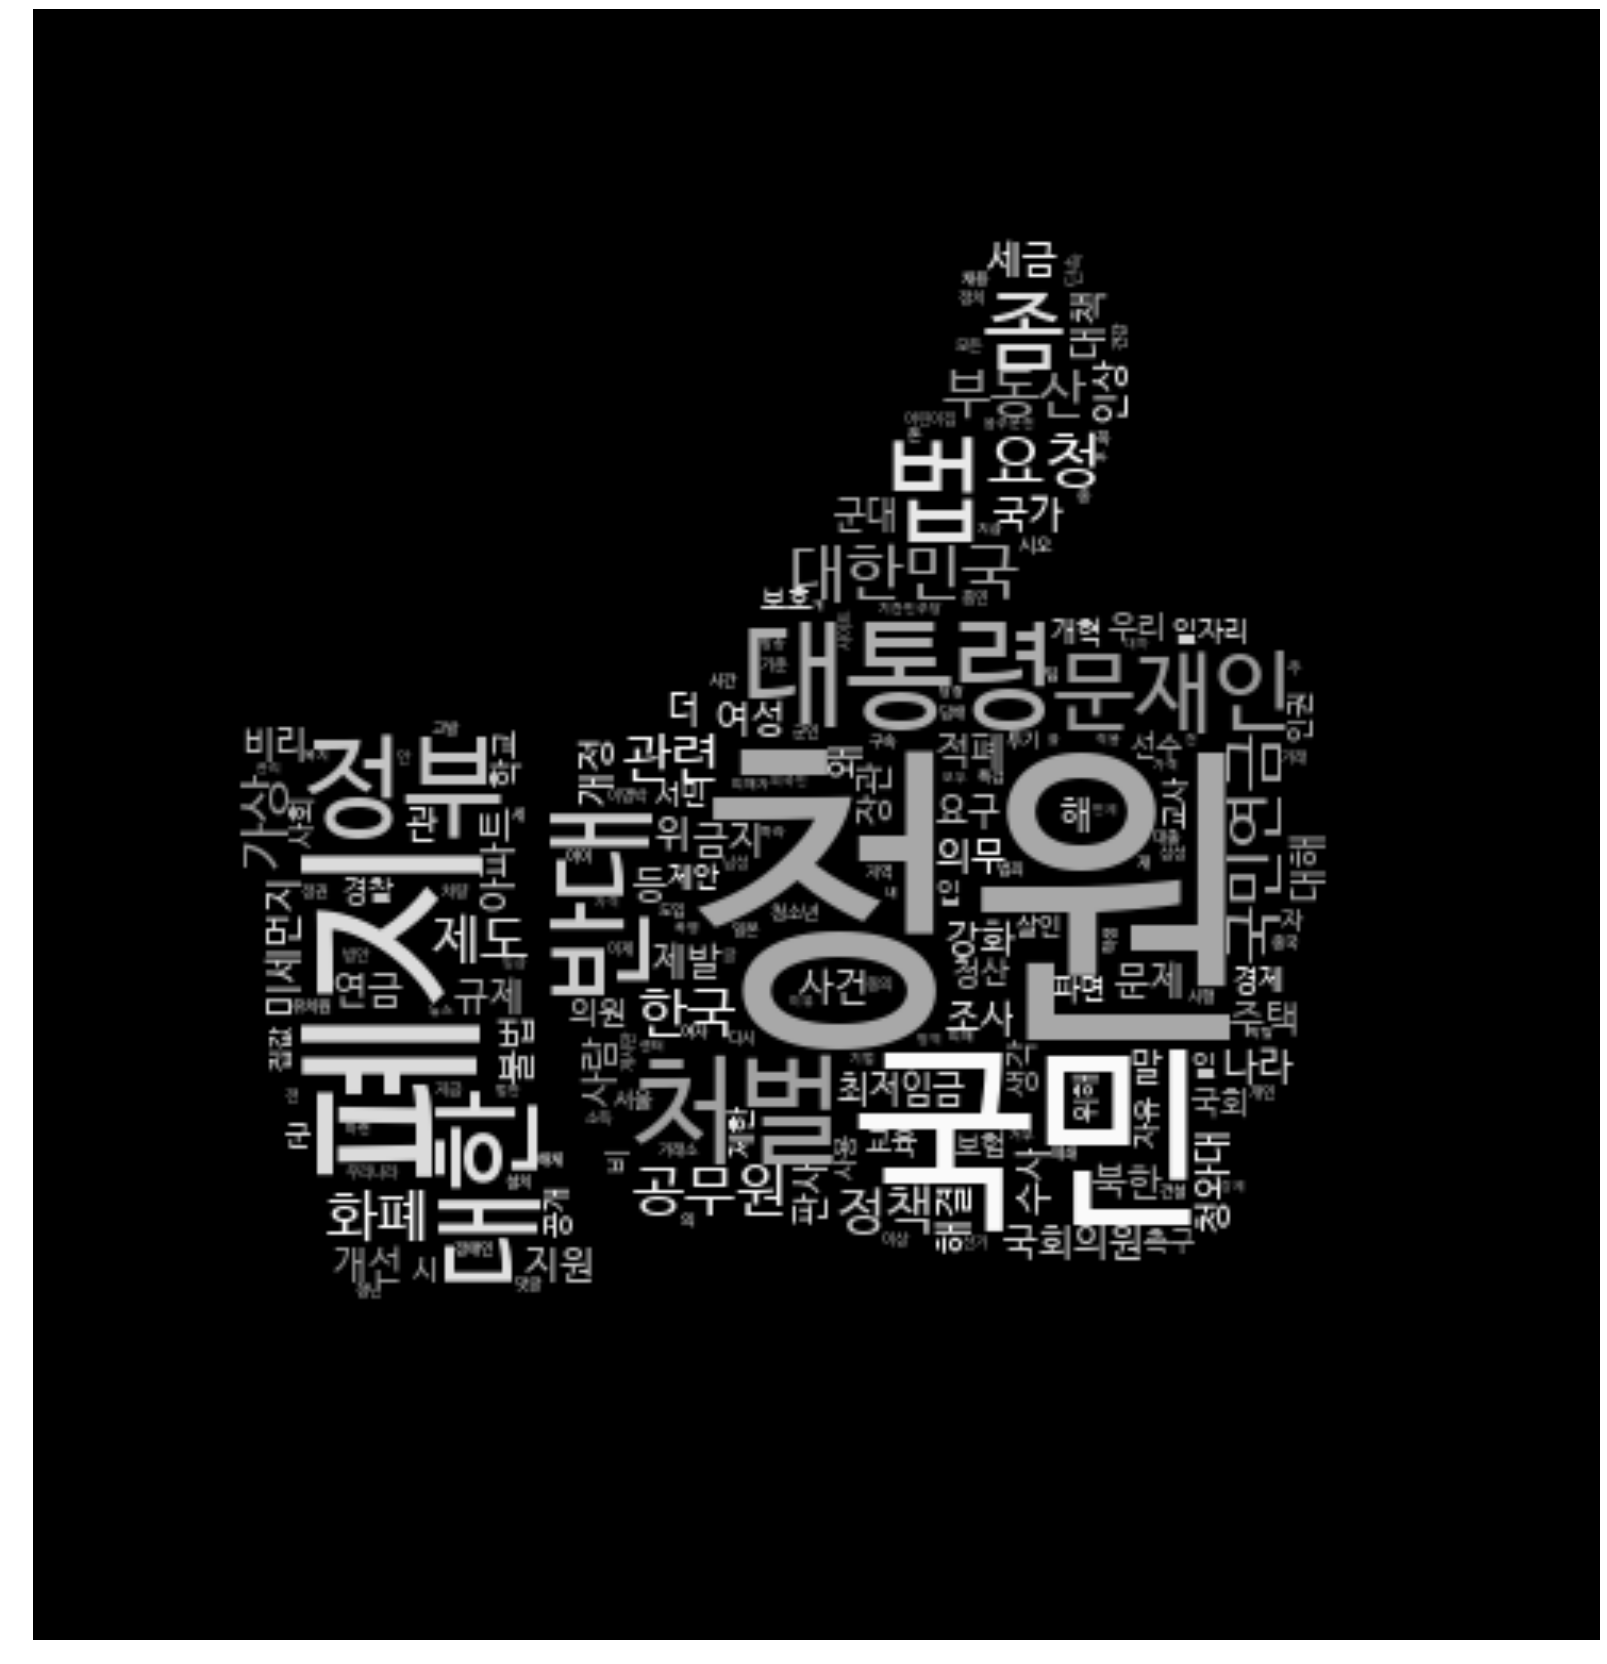

In [48]:
keyword3 = make_cloud(df[(df["count"]>=6) & (df["count"]<=10)],"기타", png_name="4.JPG",state="grey",max_font_size_n = 100,background_color_n='black')

1213607
ok


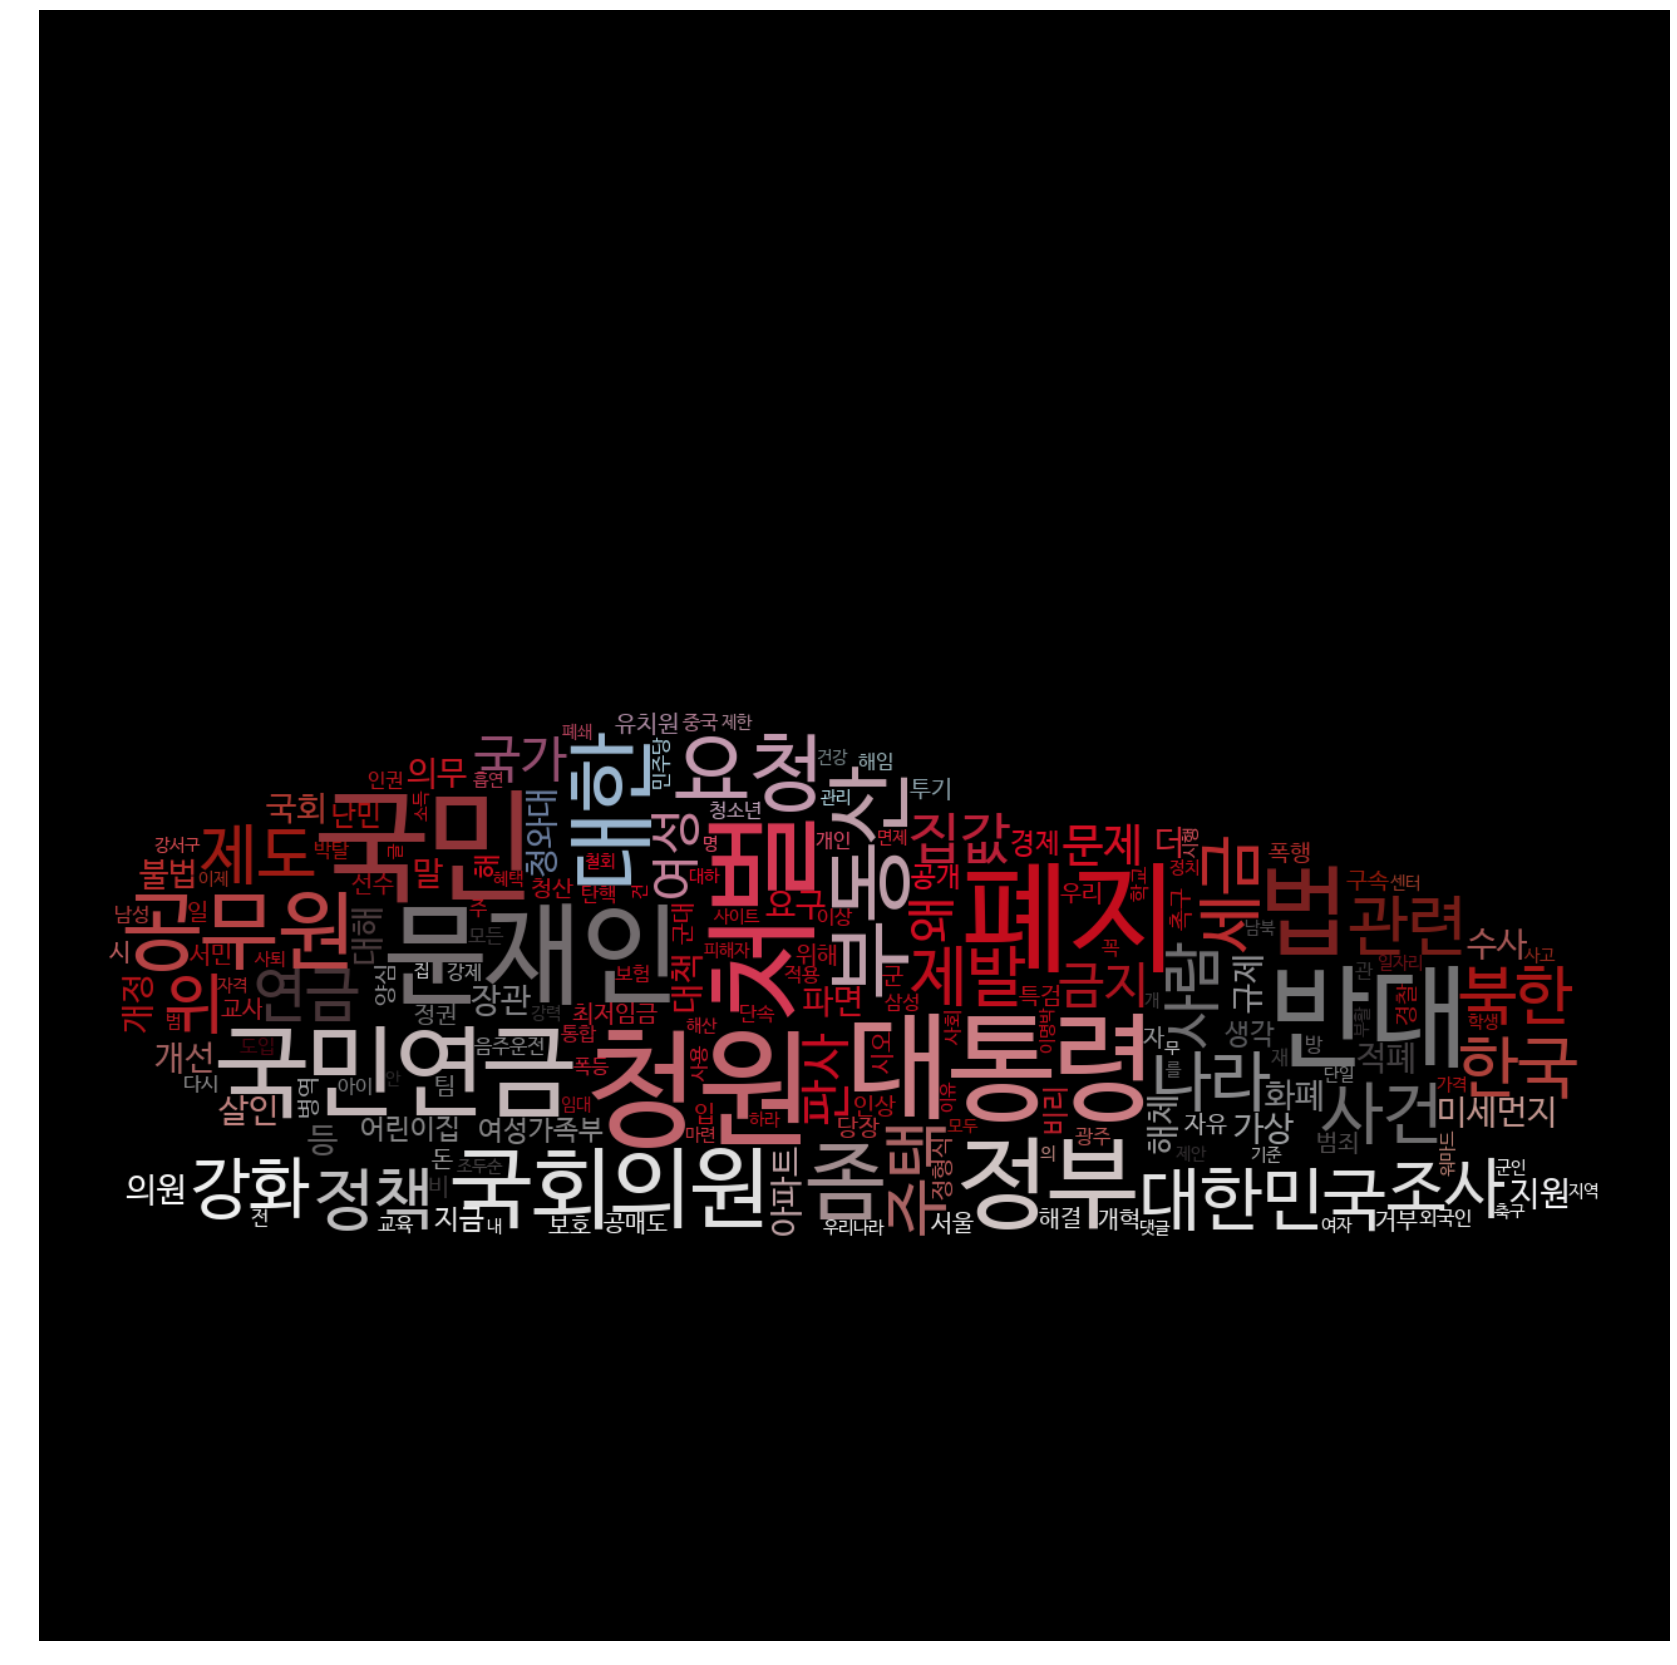

In [52]:
keyword4 = make_cloud(df[(df["count"]>=11) & (df["count"]<=20)],"기타", png_name="5.jpg",state="img",max_font_size_n = 100,background_color_n='black')

850856
ok


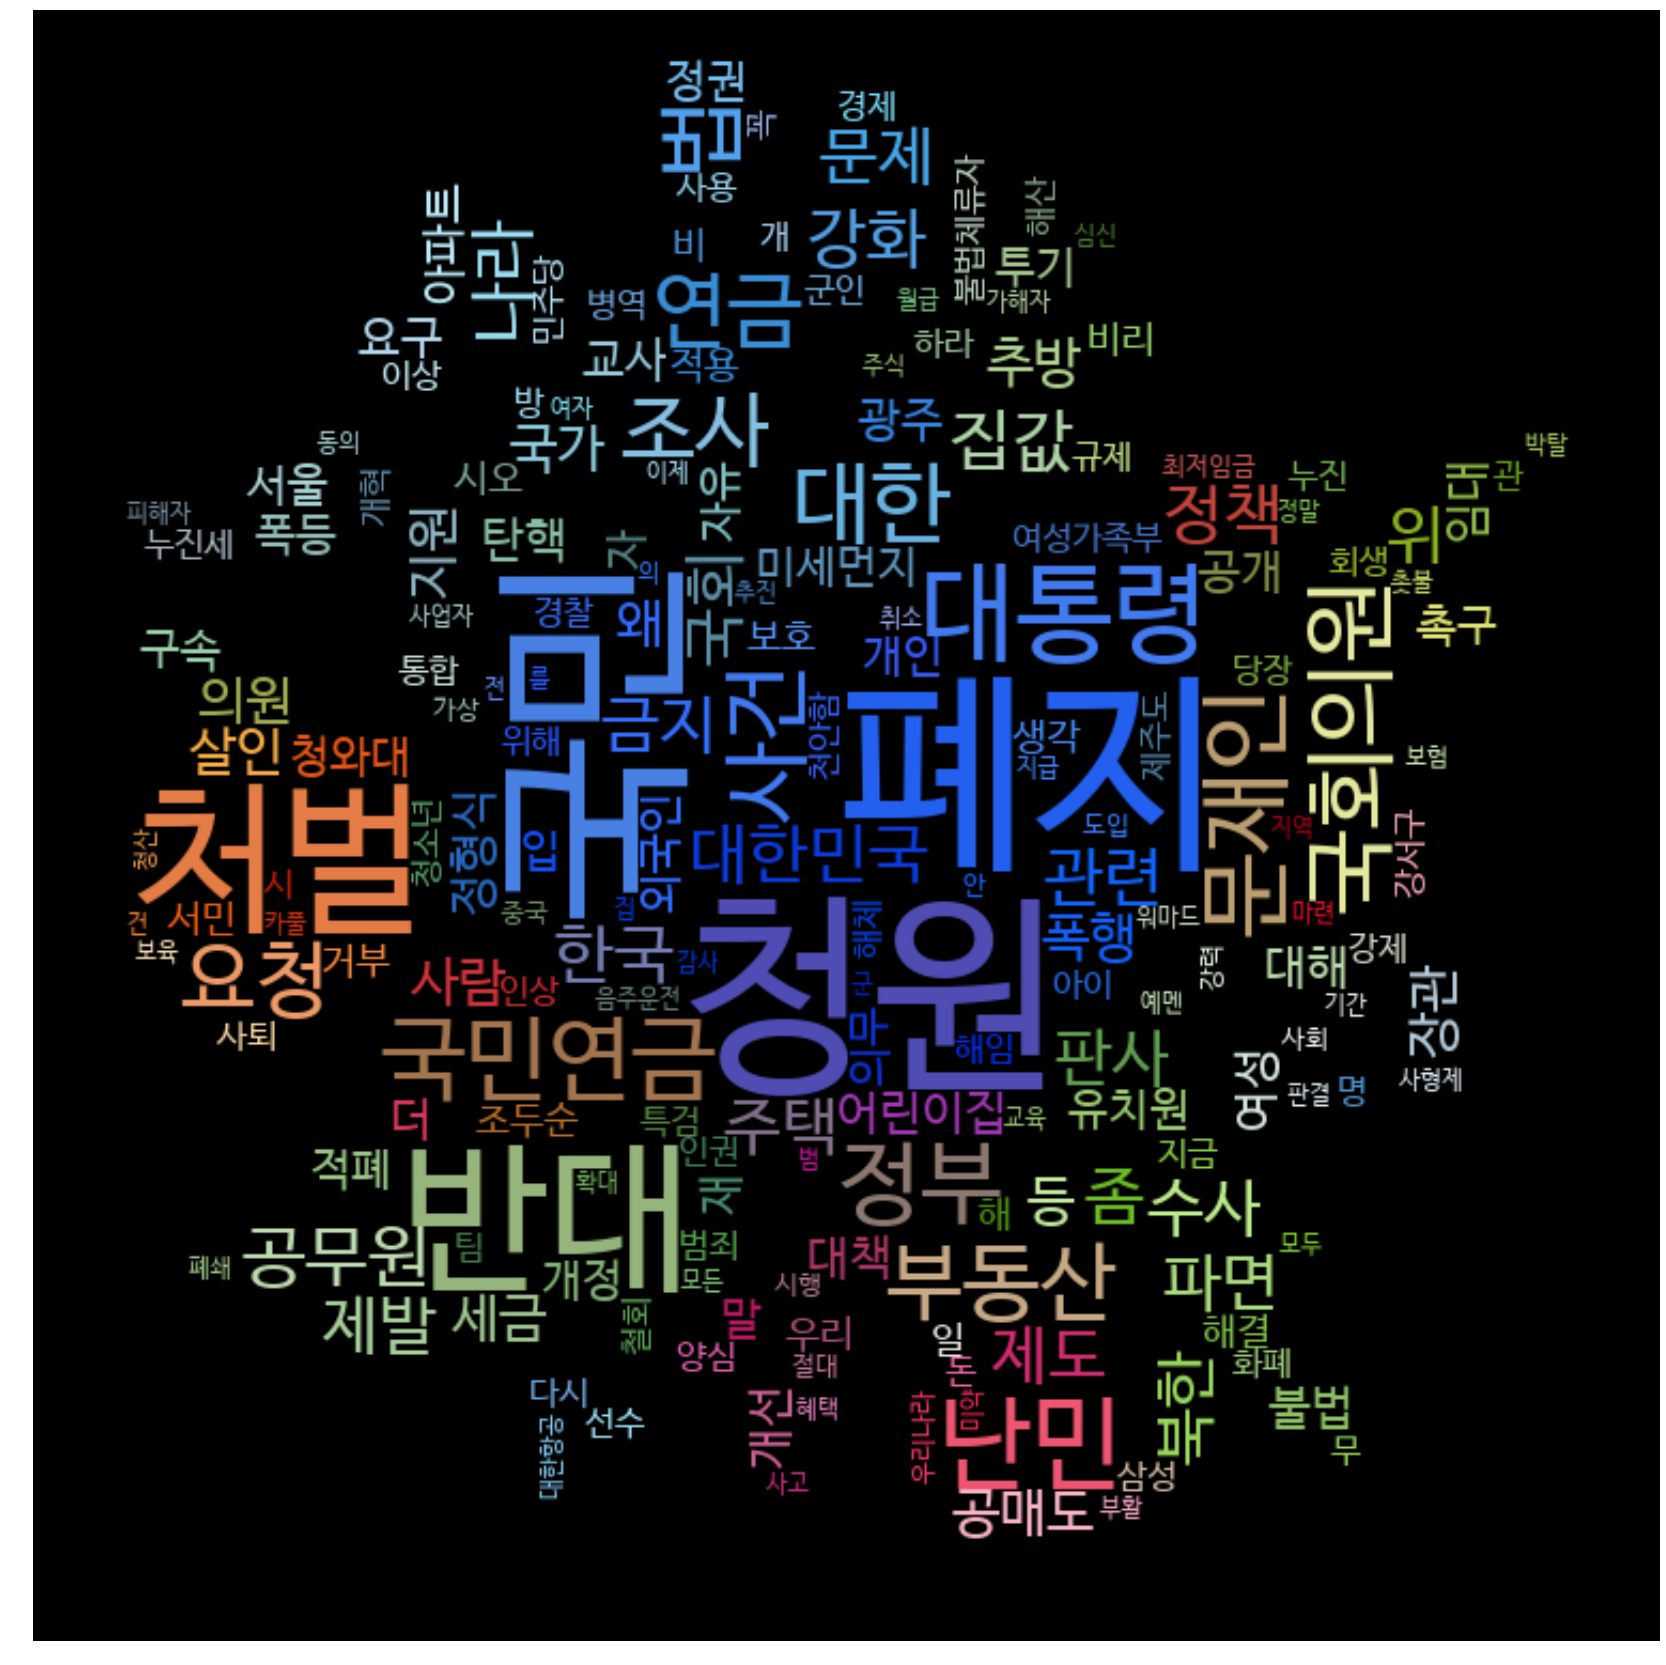

In [45]:
keyword5 = make_cloud(df[(df["count"]>=21) & (df["count"]<=40)],"기타", png_name="6.JPG",state="img",max_font_size_n = 100,background_color_n='black')

581297
ok


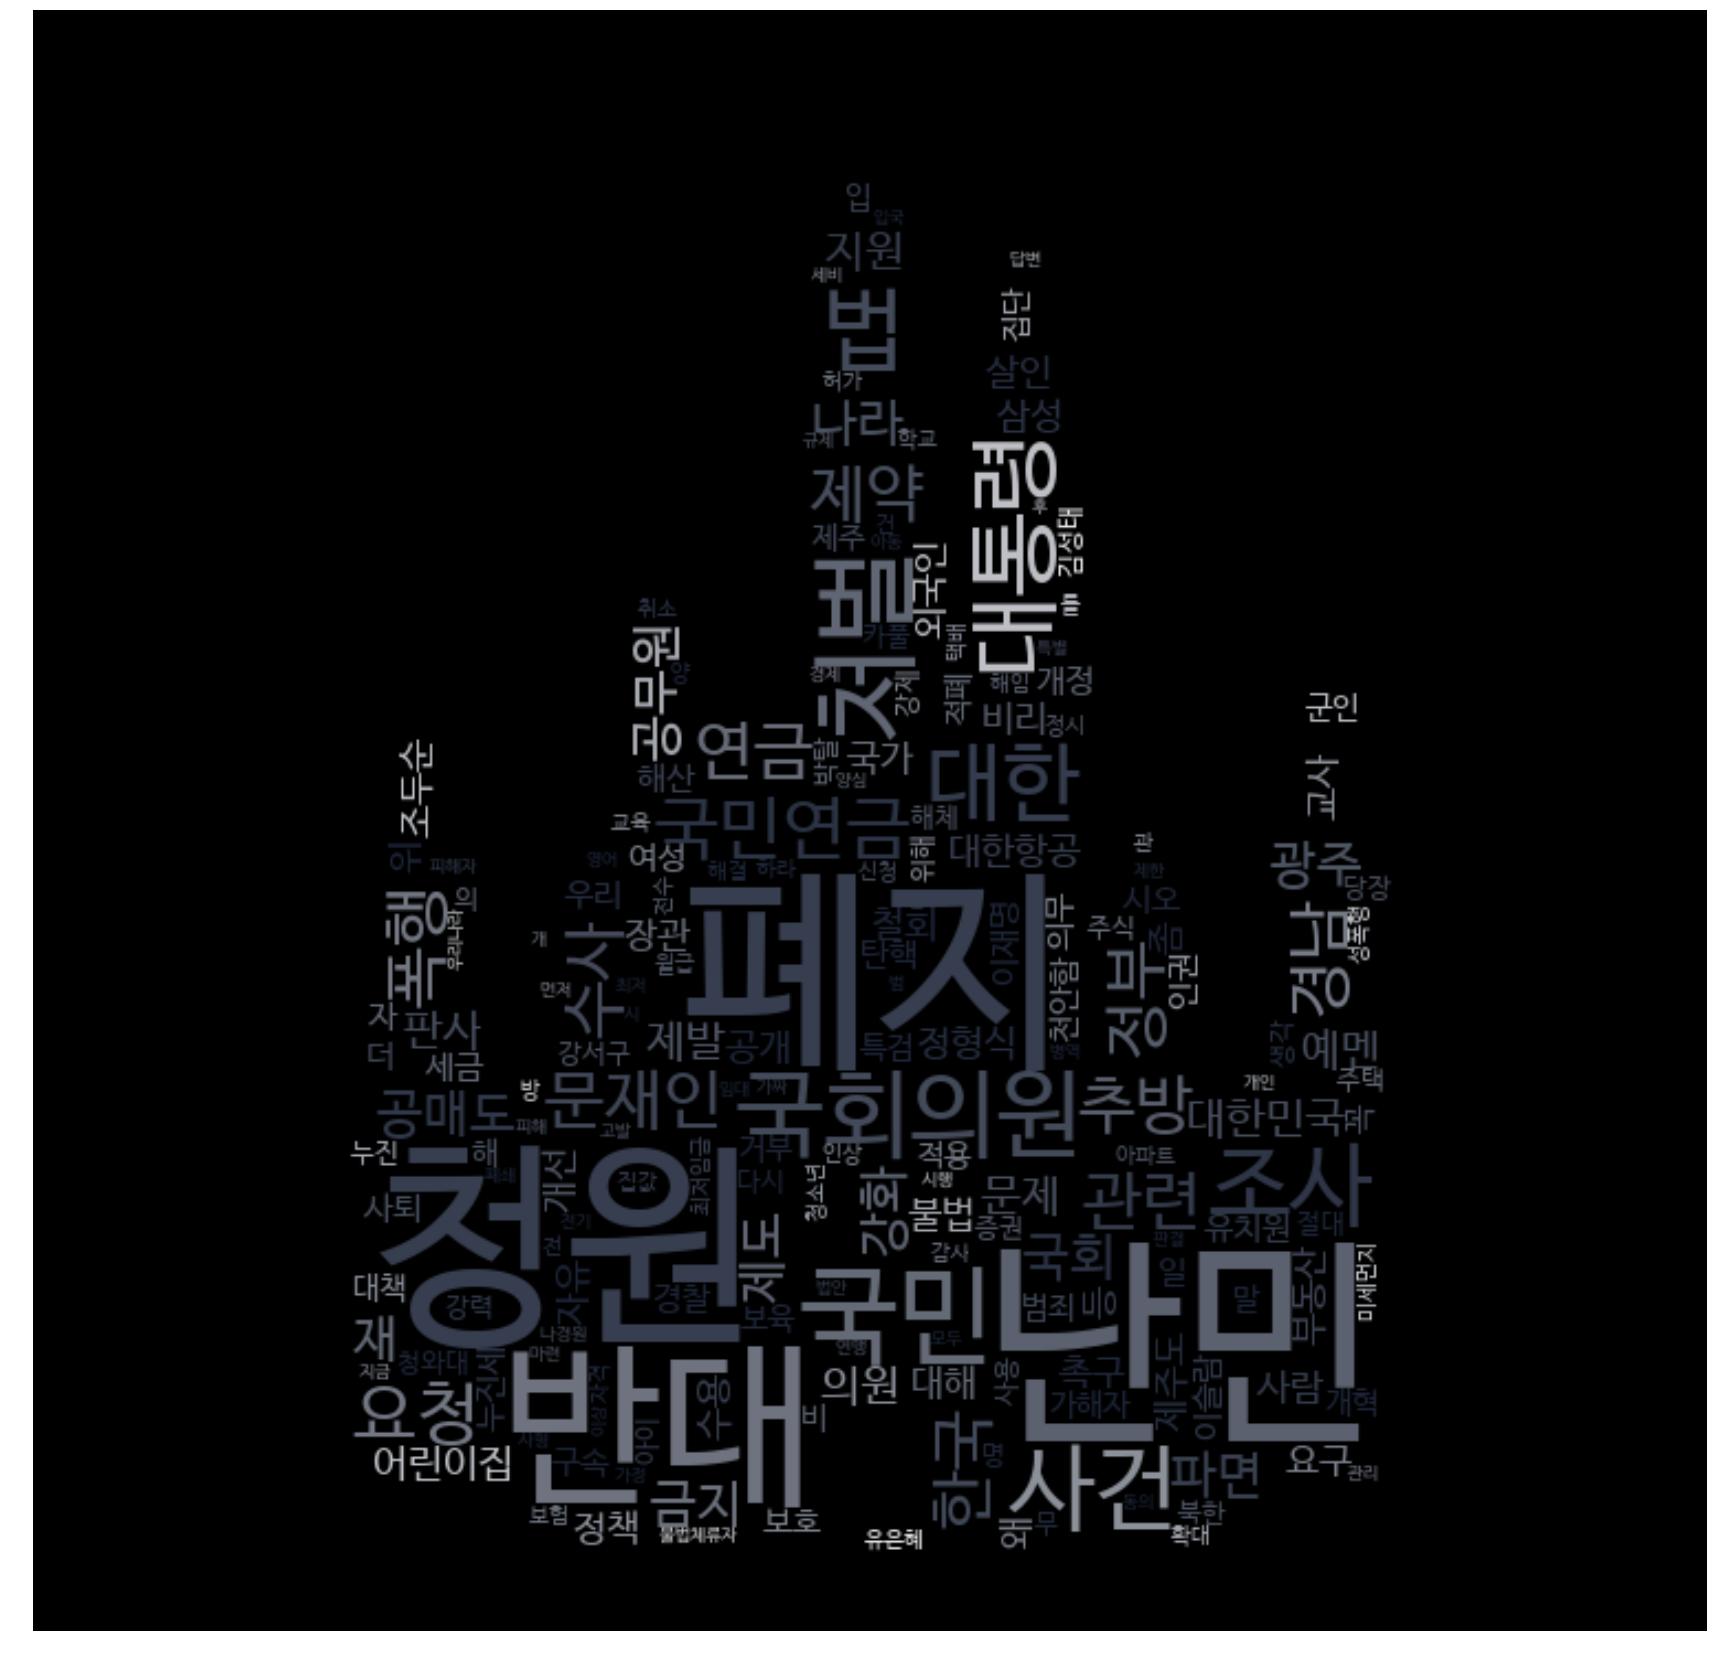

In [37]:
keyword6 = make_cloud(df[(df["count"]>=41) & (df["count"]<=100)],"기타", png_name="7.jpg",state="img",max_font_size_n = 100,background_color_n='black')

506134
ok


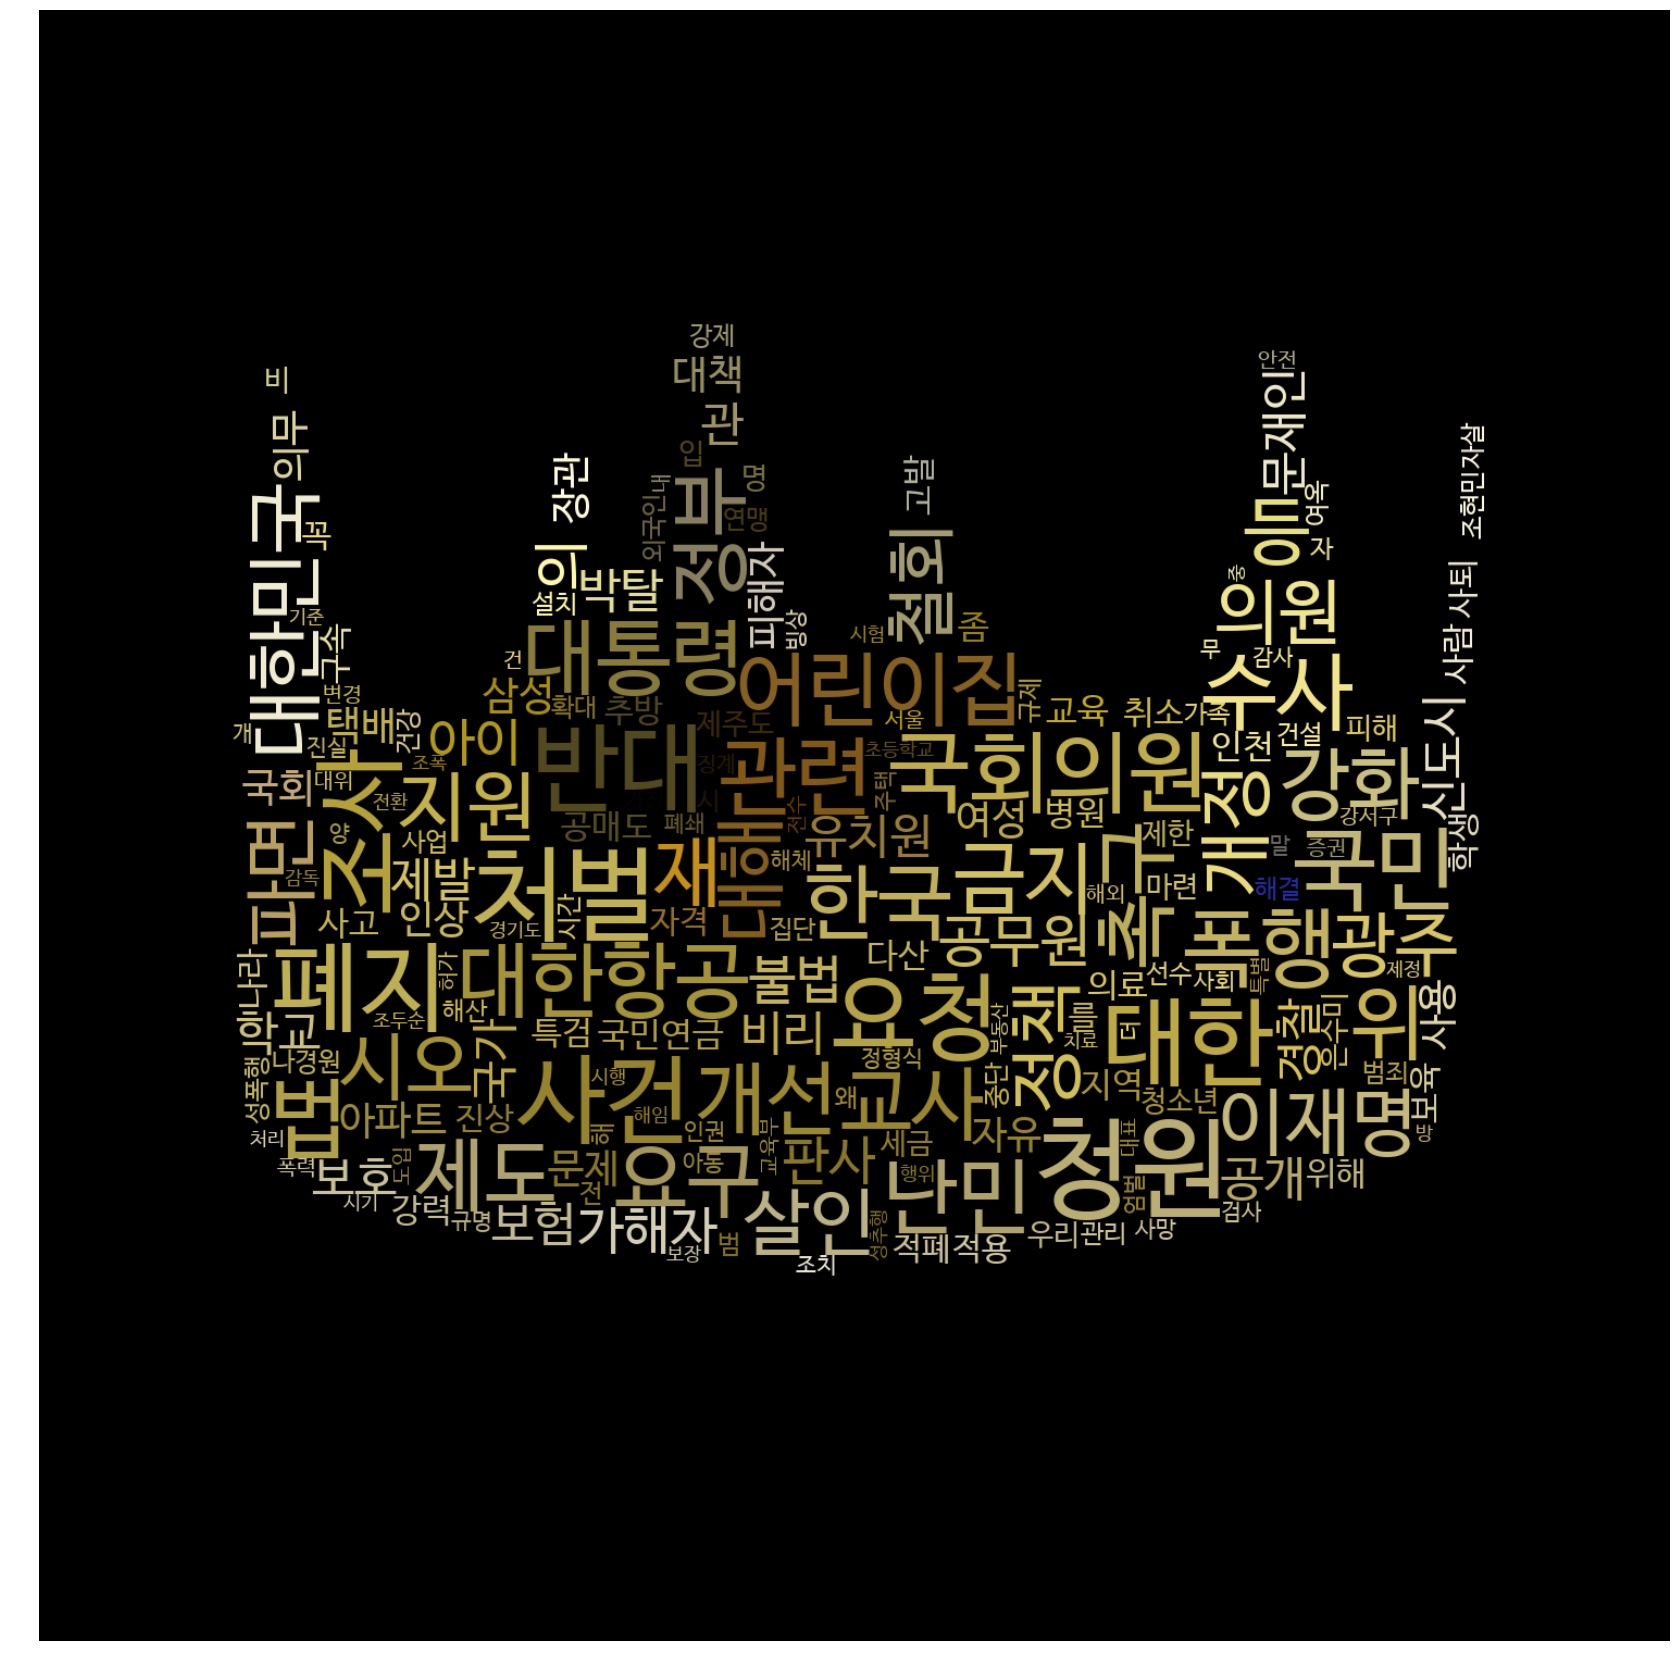

In [35]:
keyword7 = make_cloud(df[df["count"]>100],"기타", png_name="8.jpg",state="img",max_font_size_n = 100,background_color_n='black')

## 추천수가 i개인 청원에서 자주 등장하는 키워드

In [53]:
keyword0

{'폐지': 6807,
 '이명박': 5917,
 '법': 5095,
 '출국금지': 4846,
 '청소년': 4585,
 '반대': 3974,
 '조두순': 3218,
 '청원': 3200,
 '보호': 2886,
 '소년법': 2190,
 '대통령': 1656,
 '화폐': 1521,
 '가상': 1421,
 '금지': 1366,
 '국민': 1345,
 '요청': 1176,
 '대한': 1015,
 '관련': 910,
 '출국': 905,
 '정부': 883,
 '처벌': 861,
 '위': 852,
 '대한민국': 780,
 '좀': 755,
 '문재인': 702,
 '개선': 687,
 '문제': 664,
 '거래소': 636,
 '개정': 634,
 '사건': 628,
 '국가': 622,
 '지원': 620,
 '제도': 582,
 '정책': 577,
 '한국': 561,
 '범죄': 548,
 '공무원': 535,
 '제안': 522,
 '대해': 517,
 '경찰': 508,
 '동의': 503,
 '수사': 495,
 '조사': 461,
 '규제': 460,
 '등': 458,
 '해결': 454,
 '사람': 453,
 '제발': 445,
 '교육': 433,
 '강화': 431,
 '청와대': 422,
 '일자리': 422,
 '관': 419,
 '부산': 417,
 '불법': 408,
 '해': 407,
 '추천': 396,
 '나라': 393,
 '보험': 391,
 '관리': 388,
 '하우스': 378,
 '크림': 376,
 '시': 363,
 '전': 361,
 '안전': 351,
 '폐쇄': 351,
 '소': 340,
 '글': 335,
 '인권': 323,
 '적폐': 321,
 '왜': 320,
 '전대통령': 318,
 '위해': 311,
 '건': 307,
 '개혁': 306,
 '순': 306,
 '우리': 305,
 '학교': 304,
 '주택': 303,
 '폭행': 303,
 '대하': 301,
 '꼭': 2

In [54]:
keyword1

{'청원': 4760,
 '폐지': 4278,
 '법': 3147,
 '이명박': 2823,
 '국민': 2715,
 '대통령': 2367,
 '출국금지': 2205,
 '반대': 2140,
 '대한': 1951,
 '청소년': 1851,
 '화폐': 1756,
 '처벌': 1586,
 '요청': 1575,
 '가상': 1571,
 '좀': 1533,
 '정부': 1513,
 '관련': 1490,
 '보호': 1450,
 '대한민국': 1434,
 '개선': 1358,
 '금지': 1299,
 '제도': 1258,
 '위': 1226,
 '문제': 1164,
 '지원': 1152,
 '공무원': 1104,
 '문재인': 1096,
 '정책': 1054,
 '국가': 1044,
 '한국': 1015,
 '사람': 931,
 '규제': 918,
 '제안': 904,
 '등': 895,
 '소년법': 869,
 '일자리': 862,
 '대해': 848,
 '조사': 840,
 '관': 832,
 '조두순': 800,
 '개정': 797,
 '해결': 773,
 '경찰': 759,
 '불법': 744,
 '사건': 722,
 '청와대': 705,
 '강화': 700,
 '보험': 700,
 '주택': 699,
 '교육': 696,
 '의무': 681,
 '학교': 663,
 '해': 662,
 '나라': 635,
 '아파트': 626,
 '제발': 626,
 '거래소': 626,
 '대책': 625,
 '왜': 623,
 '시': 619,
 '부동산': 612,
 '위해': 611,
 '적폐': 602,
 '세금': 600,
 '청년': 595,
 '더': 588,
 '북한': 586,
 '관리': 559,
 '제한': 542,
 '사회': 541,
 '센터': 537,
 '시험': 529,
 '수사': 518,
 '사용': 518,
 '개혁': 516,
 '인권': 513,
 '우리': 512,
 '생각': 507,
 '방안': 505,
 '안전': 504,
 '비

In [55]:
keyword2

{'청원': 4512,
 '국민': 2890,
 '폐지': 2774,
 '대통령': 2316,
 '처벌': 2043,
 '법': 1938,
 '대한': 1819,
 '반대': 1740,
 '정부': 1720,
 '좀': 1584,
 '화폐': 1463,
 '대한민국': 1341,
 '요청': 1323,
 '문재인': 1292,
 '가상': 1279,
 '관련': 1216,
 '공무원': 1203,
 '개선': 1179,
 '제도': 1145,
 '위': 1142,
 '정책': 1039,
 '문제': 1026,
 '국가': 1017,
 '한국': 985,
 '규제': 958,
 '금지': 948,
 '지원': 914,
 '사람': 891,
 '강화': 890,
 '조사': 857,
 '등': 829,
 '왜': 808,
 '나라': 791,
 '부동산': 780,
 '청와대': 752,
 '대해': 729,
 '관': 725,
 '주택': 723,
 '세금': 716,
 '국민연금': 713,
 '해결': 709,
 '청소년': 705,
 '사건': 697,
 '개정': 688,
 '일자리': 682,
 '제발': 676,
 '의무': 671,
 '미세먼지': 665,
 '이명박': 660,
 '불법': 647,
 '북한': 644,
 '아파트': 635,
 '보험': 624,
 '보호': 623,
 '적폐': 622,
 '학교': 619,
 '대책': 614,
 '제안': 612,
 '최저임금': 612,
 '교육': 602,
 '경찰': 602,
 '해': 596,
 '인권': 596,
 '여성': 590,
 '더': 585,
 '국회의원': 554,
 '수사': 552,
 '시': 551,
 '비리': 543,
 '위해': 536,
 '장관': 530,
 '우리': 516,
 '사용': 513,
 '사회': 510,
 '대출': 509,
 '군대': 507,
 '비': 493,
 '장애인': 493,
 '생각': 492,
 '제한': 487,
 '서민': 

In [56]:
keyword3

{'청원': 3889,
 '국민': 2785,
 '폐지': 2504,
 '대통령': 2303,
 '처벌': 2182,
 '반대': 1665,
 '정부': 1627,
 '법': 1581,
 '대한': 1479,
 '문재인': 1462,
 '좀': 1388,
 '대한민국': 1227,
 '요청': 1126,
 '국민연금': 1111,
 '공무원': 1096,
 '화폐': 1071,
 '부동산': 1003,
 '관련': 984,
 '정책': 959,
 '한국': 920,
 '가상': 917,
 '제도': 908,
 '국회의원': 889,
 '위': 879,
 '강화': 868,
 '사람': 854,
 '나라': 822,
 '문제': 821,
 '개선': 817,
 '사건': 806,
 '조사': 800,
 '국가': 787,
 '금지': 772,
 '규제': 752,
 '제발': 746,
 '미세먼지': 741,
 '왜': 734,
 '세금': 722,
 '지원': 716,
 '등': 700,
 '주택': 693,
 '여성': 673,
 '적폐': 632,
 '청와대': 631,
 '의무': 630,
 '북한': 624,
 '대책': 610,
 '연금': 594,
 '아파트': 593,
 '수사': 587,
 '대해': 582,
 '불법': 569,
 '개정': 568,
 '해결': 539,
 '최저임금': 517,
 '말': 508,
 '장관': 504,
 '비리': 497,
 '더': 493,
 '해': 492,
 '군대': 479,
 '관': 476,
 '요구': 466,
 '판사': 465,
 '인상': 463,
 '청산': 459,
 '국회': 459,
 '의원': 458,
 '우리': 451,
 '학교': 444,
 '생각': 442,
 '교육': 438,
 '파면': 435,
 '경찰': 433,
 '경제': 433,
 '보험': 431,
 '입': 427,
 '비': 423,
 '일자리': 423,
 '인권': 417,
 '개혁': 413,
 '교사'

In [57]:
keyword4

{'청원': 3199,
 '국민': 2771,
 '폐지': 2445,
 '처벌': 2207,
 '대통령': 2133,
 '반대': 1688,
 '문재인': 1579,
 '국민연금': 1454,
 '정부': 1436,
 '법': 1318,
 '국회의원': 1274,
 '대한': 1273,
 '부동산': 1130,
 '좀': 1099,
 '공무원': 1054,
 '요청': 1015,
 '대한민국': 1015,
 '사건': 957,
 '나라': 878,
 '정책': 876,
 '관련': 861,
 '강화': 837,
 '조사': 818,
 '한국': 810,
 '제도': 748,
 '제발': 747,
 '위': 741,
 '세금': 740,
 '주택': 721,
 '북한': 708,
 '연금': 696,
 '사람': 686,
 '집값': 670,
 '국가': 665,
 '왜': 648,
 '판사': 621,
 '여성': 616,
 '금지': 615,
 '문제': 614,
 '미세먼지': 610,
 '개선': 597,
 '수사': 590,
 '화폐': 576,
 '지원': 575,
 '의무': 557,
 '등': 555,
 '청와대': 545,
 '장관': 545,
 '더': 533,
 '대책': 529,
 '아파트': 522,
 '가상': 503,
 '파면': 490,
 '의원': 490,
 '적폐': 478,
 '요구': 478,
 '대해': 476,
 '국회': 463,
 '개정': 461,
 '말': 459,
 '살인': 459,
 '규제': 452,
 '해체': 451,
 '불법': 450,
 '여성가족부': 441,
 '공개': 424,
 '경제': 423,
 '지금': 418,
 '비리': 415,
 '생각': 413,
 '난민': 412,
 '어린이집': 411,
 '해': 410,
 '최저임금': 408,
 '자유': 404,
 '유치원': 402,
 '촉구': 400,
 '해결': 399,
 '입': 392,
 '교사': 391,
 '인상': 388

In [58]:
keyword5

{'폐지': 2393,
 '청원': 2265,
 '국민': 1943,
 '반대': 1657,
 '처벌': 1615,
 '대통령': 1590,
 '난민': 1262,
 '국민연금': 1251,
 '국회의원': 1236,
 '문재인': 1191,
 '정부': 1008,
 '법': 918,
 '사건': 910,
 '대한': 876,
 '부동산': 874,
 '요청': 798,
 '연금': 755,
 '조사': 746,
 '공무원': 744,
 '집값': 678,
 '나라': 645,
 '대한민국': 634,
 '관련': 597,
 '한국': 587,
 '정책': 586,
 '강화': 586,
 '좀': 571,
 '제도': 507,
 '판사': 503,
 '위': 498,
 '주택': 493,
 '문제': 490,
 '파면': 489,
 '제발': 482,
 '수사': 478,
 '국회': 469,
 '금지': 468,
 '북한': 466,
 '공매도': 456,
 '의원': 451,
 '사람': 445,
 '왜': 445,
 '국가': 427,
 '세금': 426,
 '지원': 421,
 '폭행': 414,
 '등': 408,
 '추방': 402,
 '장관': 389,
 '살인': 388,
 '어린이집': 378,
 '대책': 370,
 '탄핵': 366,
 '재': 363,
 '더': 358,
 '정형식': 358,
 '개선': 356,
 '광주': 353,
 '요구': 351,
 '불법': 339,
 '여성': 337,
 '대해': 329,
 '교사': 323,
 '임대': 323,
 '공개': 322,
 '미세먼지': 317,
 '입': 313,
 '유치원': 309,
 '적폐': 306,
 '청와대': 305,
 '아파트': 303,
 '폭등': 300,
 '투기': 297,
 '말': 296,
 '자유': 292,
 '구속': 291,
 '개인': 290,
 '외국인': 289,
 '촉구': 279,
 '서울': 279,
 '개정': 278,
 '의무':

In [59]:
keyword6

{'난민': 2071,
 '청원': 1863,
 '폐지': 1829,
 '반대': 1502,
 '국민': 1325,
 '처벌': 1306,
 '국회의원': 1064,
 '사건': 980,
 '법': 826,
 '조사': 779,
 '대통령': 743,
 '대한': 729,
 '국민연금': 698,
 '요청': 684,
 '폭행': 581,
 '관련': 529,
 '문재인': 517,
 '정부': 489,
 '연금': 472,
 '수사': 467,
 '경남': 443,
 '한국': 442,
 '제약': 425,
 '추방': 419,
 '공매도': 418,
 '파면': 403,
 '금지': 393,
 '공무원': 378,
 '강화': 377,
 '광주': 370,
 '재': 368,
 '국회': 366,
 '제도': 351,
 '나라': 350,
 '대한민국': 350,
 '문제': 343,
 '판사': 336,
 '제발': 328,
 '예멘': 318,
 '의원': 317,
 '지원': 315,
 '어린이집': 312,
 '대한항공': 312,
 '제주도': 311,
 '위': 310,
 '살인': 302,
 '교사': 292,
 '정책': 285,
 '요구': 277,
 '대해': 276,
 '왜': 270,
 '사람': 266,
 '불법': 265,
 '국가': 262,
 '좀': 259,
 '정형식': 259,
 '개선': 255,
 '등': 252,
 '외국인': 250,
 '촉구': 248,
 '장관': 242,
 '철회': 236,
 '조두순': 233,
 '공개': 233,
 '부동산': 229,
 '삼성': 227,
 '자유': 225,
 '수용': 225,
 '비리': 224,
 '유치원': 223,
 '구속': 223,
 '탄핵': 223,
 '세금': 223,
 '보호': 222,
 '개정': 215,
 '천안함': 214,
 '경찰': 210,
 '이재명': 207,
 '더': 202,
 '자': 201,
 '해산': 197,
 '사퇴': 

In [60]:
keyword7

{'청원': 1874,
 '처벌': 1425,
 '폐지': 1044,
 '반대': 965,
 '사건': 941,
 '대한': 886,
 '요청': 808,
 '조사': 786,
 '국민': 694,
 '국회의원': 592,
 '법': 561,
 '관련': 502,
 '폭행': 473,
 '수사': 467,
 '난민': 408,
 '대통령': 407,
 '요구': 380,
 '대한항공': 380,
 '촉구': 377,
 '한국': 369,
 '위': 361,
 '교사': 342,
 '어린이집': 333,
 '개선': 320,
 '제도': 320,
 '금지': 304,
 '강화': 300,
 '정부': 298,
 '재': 282,
 '지원': 275,
 '대한민국': 269,
 '이재명': 269,
 '시오': 266,
 '살인': 264,
 '등': 255,
 '정책': 247,
 '파면': 246,
 '개정': 240,
 '광주': 239,
 '의원': 238,
 '대해': 234,
 '철회': 221,
 '공무원': 220,
 '의': 218,
 '가해자': 215,
 '아이': 212,
 '불법': 212,
 '판사': 212,
 '유치원': 209,
 '경찰': 209,
 '문재인': 208,
 '신도시': 208,
 '국가': 206,
 '학교': 205,
 '비리': 205,
 '공개': 205,
 '제발': 199,
 '보험': 199,
 '박탈': 193,
 '보호': 192,
 '관': 188,
 '아파트': 186,
 '국회': 185,
 '피해자': 183,
 '문제': 181,
 '여성': 180,
 '대책': 178,
 '장관': 177,
 '삼성': 176,
 '택배': 174,
 '의무': 172,
 '자유': 170,
 '인상': 168,
 '사용': 168,
 '국민연금': 168,
 '교육': 167,
 '인천': 167,
 '좀': 167,
 '다산': 163,
 '지역': 163,
 '공매도': 163,
 '위해': 162,
